### Logistic Regression Exercise

In [1]:
# import numpy
import numpy as np

# import linear_model and datasets from sklearn
from sklearn import linear_model, datasets

# import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix


In [2]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# 


* print the shape of X

In [4]:
X.shape

(150, 4)

In [5]:
X[1:4]

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

* print y

In [6]:
y.shape

(150,)

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

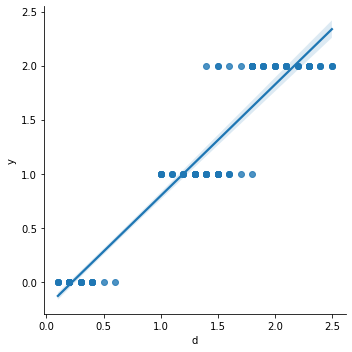

In [8]:
# ### NOT PART OF ASSIGNMENT - STILL WRAPPING HEAD AROUND THIS STUFF
# linear regression
df = pd.DataFrame(X, columns = ['a', 'b', 'c', 'd'])
df['y'] = y
df.head()
sns.lmplot(x='d', y='y', data=df);

# note these are all categorical and descrete with y - makes sense 

* create a logistic regression model
    - **Note:** Spend some time on the logistic regression documentation to get familiar with the available parameters.

In [20]:
# COME BACK TO THIS THIS IS NOT INCORPERATED
# I'm assuming we need to split data and scale...?
# SPLIT
from sklearn.model_selection import train_test_split

random_seed = 8
df_train, df_test = train_test_split(df, test_size=0.2, random_state=random_seed, stratify=df['y'])
X_train = df_train.drop(columns = ['y']).to_numpy()
y_train = df_train['y'].to_numpy()
X_test = df_test.drop(columns = ['y']).to_numpy()
y_test = df_test['y'].to_numpy()

* penalty : penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
* Cfloat, default=1.0
* l1_ratiofloat, default=None
** Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization
* fit_interceptbool, default=True
Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
* class_weightdict or ‘balanced’, default=None

In [10]:
# SPLIT TEST TRAIN - PERHAPS BELOW IS OVER FIT

In [21]:
clf = LogisticRegression(penalty='none') # logistic regression with no penalty term in the cost function.
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(score)

0.9333333333333333

* create a regularization space for the **'penalty'** parameter (a.k.a. what values do we want to insert into our GridSearch?)

In [22]:
penalty = {'penalty' : ['l1', 'l2' 'elasticnet']}  # already have none - so removing that one


* create a regularization space for the **'c'** parameter (a.k.a. what values do we want to insert into our GridSearch?)

In [23]:
C = {
#     'alpha': [1, 20, 50,100, 200, 500, 700]
    'alpha' : [1,0.1,0.01,0.001,0.0001,0]
}


* create a hyperparameter options dictionary

In [45]:
# param_grid = [
#   {'C': [1, 20, 50], 'penalty' : ['l1', 'l2'], 'max_iter':500},
# #     elastic net 0-1
# #   { 'penalty' : ['none']},

# initial 'C': [0.1, 1, 50, 100]
    
# ]
param_grid = [
    {'penalty' : penalty['penalty'], 'C': C['alpha'], 'max_iter':[500], 'solver':['liblinear']}
]

param_grid_l1 = [
    {'penalty' : ['l1'], 'C': [100, 150, 300, 450, 1000], 'solver' : ['liblinear'], 'max_iter':[500]}#, 'max_iter':[500], 'solver':['liblinear']
    ]
param_grid_l2 = [
    {'penalty' : ['l2'], 'C': [100, 150, 300, 450, 1000], 'max_iter':[500]}#, 'max_iter':[500], 'solver':['liblinear']
    ]

param_grid_en = [
    {'penalty' : ['elasticnet'], 'C': [100, 150, 300, 450, 1000], 'max_iter':[500], 'solver':['saga']}
    ]

# NOTE IF USE SAGA (VALID FOR ELASTIC NET AND NONE AS WELL) NEED TO PRE SCALE WITH SKLEARN PREPROCESSING
#     solver dependent on penalty used 
    
    

# ARRRRRRGH SPLITING THIS OUT INTO SEPARATE RUNS


* create a grid search using 5-fold cross validation

In [46]:
model = LogisticRegression()

grid_search_l1 = GridSearchCV(model, param_grid_l1, cv=5)
grid_search_l1.fit(X_train, y_train)

print("Best R_squared from l1 grid search: %.3f"
       % grid_search_l1.score(X_train, y_train))
print(grid_search_l1.best_params_)



Best R_squared from l1 grid search: 0.983
{'C': 300, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}


In [47]:
grid_search_l2 = GridSearchCV(model, param_grid_l1, cv=5)
grid_search_l2.fit(X_train, y_train)

print("Best R_squared from l2 grid search: %.3f"
       % grid_search_l2.score(X_train, y_train))
print(grid_search_l2.best_params_)



Best R_squared from l2 grid search: 0.983
{'C': 300, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}


In [48]:
grid_search_en = GridSearchCV(model, param_grid_l1, cv=5)
grid_search_en.fit(X_train, y_train)

print("Best R_squared from elastic net grid search: %.3f"
       % grid_search_en.score(X_train, y_train))
print(grid_search_en.best_params_)

Best R_squared from elastic net grid search: 0.983
{'C': 300, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}


In [49]:
# OKAY ITS WEIRD WHAT"S GOING ON ABOVE>>> ALL SUGGESTING THE SAME...

In [57]:
# WINNER!
l1_reg = LogisticRegression(C=300, penalty = 'l1', solver= 'liblinear', max_iter= 500)
l1_reg.fit(X_train,y_train)

y_l1_pred = l1_reg.predict(X_test)
score = l1_reg.score(X_test, y_test)
print(score)

0.9666666666666667


* fit the grid search

In [ ]:
# done

* take the best model from grid search

In [ ]:
# done

* print the best hyperparameters

In [58]:
print(grid_search_l1.best_params_)

{'C': 300, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}


* predict the target vector
    - class ( *predict* )
    - probabilities ( *predict_proba* )

In [ ]:
# Predict
# done above
y_l1_pred = l1_reg.predict(X_test)
score = l1_reg.score(X_test, y_test)
print(score)

In [73]:
test_prob = l1_reg.predict_proba(X_test)



In [66]:
y_test

array([2, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 0,
       0, 0, 1, 0, 0, 2, 2, 1])

In [81]:
y_l1_pred

array([1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 0,
       0, 0, 1, 0, 0, 2, 2, 1])

- plot the ROC curve and print the AUC

In [ ]:
# NOTE SHOULD PROB SCALE TEST STUFF WITH FUNCTION HERE BEFORE PLOTTING

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
https://scikit-learn.org/0.15/auto_examples/plot_roc.html

In [89]:
y_test.shape

(30,)

In [92]:
from sklearn.multiclass import OneVsRestClassifier

# classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
# y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# y_score

n_classes = 30 #y_test.shape[1]
y_score = y_prob = l1_reg.predict_proba(X_test)

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# # First aggregate all false positive rates
# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# # Then interpolate all ROC curves at this points
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(n_classes):
#     mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# # Finally average it and compute AUC
# mean_tpr /= n_classes

# fpr["macro"] = all_fpr
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# # Plot all ROC curves
# plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Some extension of Receiver operating characteristic to multi-class')
# plt.legend(loc="lower right")
# plt.show()

KeyError: 0

In [78]:
y_prob = l1_reg.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.996667 (macro),
0.996667 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.996667 (macro),
0.996667 (weighted by prevalence)


In [75]:
# plot_roc_curve(l1_reg, X_test, y_test)
# *********************************************COME BACK TO THIS! - log reg walk through good for this
# print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))

# https://scikit-learn.org/0.15/auto_examples/plot_roc.html  This has example 

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import sklearn.cross_validation

# # Import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

# # Binarize the output
# y = label_binarize(y, classes=[0, 1, 2])
# n_classes = y.shape[1]

# # Add noisy features to make the problem harder
# random_state = np.random.RandomState(0)
# n_samples, n_features = X.shape
# X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# # shuffle and split training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
#                                                     random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


ModuleNotFoundError: No module named 'sklearn.cross_validation'

* print the Logreg coeficients

In [69]:
l1_reg.coef_

array([[  0.44069282,   4.47477037,  -4.1018592 ,  -6.70770703],
       [ -0.54406738,  -2.7478292 ,   1.24798025,  -2.4173119 ],
       [ -3.49900114, -16.48560416,  17.05656008,  49.3615857 ]])

* print the Logreg intercepts

In [67]:
l1_reg.intercept_

array([  0.        ,   8.75548662, -99.43075333])